In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [2]:
df = pd.read_csv("Australian_Travel_Survey_Data.csv")

In [3]:
df.head()

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME
0,Y09H151315P01,40,2,1,1,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0,35
1,Y09H151324P01,73,1,2,1,2,1,1,2100108,703,21001,158,20101,213,Victoria,0,100
2,Y09H151340P01,85,2,2,1,1,1,1,2100108,703,21001,158,20101,213,Victoria,0,35
3,Y09H151329P01,34,2,1,1,3,1,3,2100108,703,21001,158,20101,213,Victoria,0,79
4,Y09H151325P01,68,1,2,1,3,2,3,2100108,703,21001,158,20101,213,Victoria,0,97


In [4]:
df.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

,PERSONID,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME
14,Y09H151332P01,63,1,1,1,2,1,2,2100108,703,21001,158,20101,213,Victoria,10,85
28,Y09H151305P04,19,2,1,1,3,2,4,2100109,1874,21001,158,20101,213,Victoria,10,23
42,Y09H154224P02,57,2,1,1,2,2,4,2100204,1042,21002,975,20101,213,Victoria,50,15
48,Y09H154228P02,62,2,2,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,29,50
52,Y09H154228P01,64,1,1,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,29,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,Y09H260728P01,25,2,2,1,3,1,2,3144416,736,31444,88,31606,30,Queensland,20,60
41518,Y09H260742P01,50,2,1,1,1,1,1,3144427,947,31444,88,31606,30,Queensland,6,108
41520,Y09H260730P02,33,2,1,1,3,2,5,3144427,947,31444,88,31606,30,Queensland,35,55
41527,Y09H260722P02,59,1,1,1,5,1,3,3144427,947,31444,88,31606,30,Queensland,30,13


In [5]:
# Accoding to google maps we have found that time took to travel 500 meters
# Cars = 2 mins
# Walking = 6 mins
# cycling = 2 mins

### To aggreagte the ACTIVE_TRAVEL_TIME = WALKING+CYCLING/2 = 6+2/2 = 4 mins

### Hence With Car 1 km in 4 mins and by Walking/Cycling = 8 mins.

In [6]:
df['ACTIVE_TRAVEL_TIME'] = df['ACTIVE_TRAVEL_TIME'].apply(lambda x: x/8)
df['CAR_TIME'] = df['CAR_TIME'].apply(lambda x: x/4)

In [7]:
df.drop(['PERSONID'], axis = 1, inplace = True)

In [8]:
#df['SA1_NAME'] = "NA"
df['SA2_NAME'] = "NA"
df['SA3_NAME'] = "NA"

In [9]:
df['RESULT'] = "NA"
df.loc[df.ACTIVE_TRAVEL_TIME < df.CAR_TIME,"RESULT"] = "SEDENTARY" 
df.loc[df.ACTIVE_TRAVEL_TIME > df.CAR_TIME,"RESULT"] = "ACTIVE"

In [10]:
df.loc[(df.GENDER == 1),"GENDER"] = "MALE"
df.loc[(df.GENDER == 2),"GENDER"] = "FEMALE"

In [11]:
df.loc[(df.ANYWORK == 1),"ANYWORK"] = "YES"
df.loc[(df.ANYWORK == 2),"ANYWORK"] = "NO"

In [12]:
df.query("ACTIVE_TRAVEL_TIME == CAR_TIME")

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
224,24,FEMALE,YES,1,5,2,5,2100232,1807,21002,975,20101,213,Victoria,2.50,2.50,NA,NA,NA
254,70,FEMALE,NO,1,1,1,1,2100303,1025,21003,238,20101,213,Victoria,7.50,7.50,NA,NA,NA
453,56,FEMALE,NO,1,5,1,3,2100323,1139,21003,238,20101,213,Victoria,1.25,1.25,NA,NA,NA
542,74,MALE,NO,1,2,2,2,2100334,2060,21003,238,20101,213,Victoria,5.00,5.00,NA,NA,NA
640,53,FEMALE,YES,1,2,2,2,2100351,762,21003,238,20101,213,Victoria,0.00,0.00,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41200,47,MALE,YES,1,3,1,4,3144021,208,31440,17,31606,30,Queensland,0.00,0.00,NA,NA,NA
41226,40,MALE,YES,1,3,2,3,3144106,469,31441,30,31606,30,Queensland,0.00,0.00,NA,NA,NA
41274,43,FEMALE,YES,1,2,2,3,3144205,267,31442,71,31606,30,Queensland,0.00,0.00,NA,NA,NA
41283,47,MALE,YES,1,2,2,3,3144205,267,31442,71,31606,30,Queensland,0.00,0.00,NA,NA,NA


### We have found 307 records which have same travel time and car time.

In [13]:
### Creating new dataframe without NA result.

df1 = df.query("ACTIVE_TRAVEL_TIME != CAR_TIME")

In [14]:
df1.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
14,63,MALE,YES,1,2,1,2,2100108,703,21001,158,20101,213,Victoria,1.250,21.25,NA,NA,SEDENTARY
28,19,FEMALE,YES,1,3,2,4,2100109,1874,21001,158,20101,213,Victoria,1.250,5.75,NA,NA,SEDENTARY
42,57,FEMALE,YES,1,2,2,4,2100204,1042,21002,975,20101,213,Victoria,6.250,3.75,NA,NA,ACTIVE
48,62,FEMALE,NO,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,3.625,12.50,NA,NA,SEDENTARY
52,64,MALE,YES,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,3.625,12.50,NA,NA,SEDENTARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41504,25,FEMALE,NO,1,3,1,2,3144416,736,31444,88,31606,30,Queensland,2.500,15.00,NA,NA,SEDENTARY
41518,50,FEMALE,YES,1,1,1,1,3144427,947,31444,88,31606,30,Queensland,0.750,27.00,NA,NA,SEDENTARY
41520,33,FEMALE,YES,1,3,2,5,3144427,947,31444,88,31606,30,Queensland,4.375,13.75,NA,NA,SEDENTARY
41527,59,MALE,YES,1,5,1,3,3144427,947,31444,88,31606,30,Queensland,3.750,3.25,NA,NA,ACTIVE


### Creating date bins with the user defined range

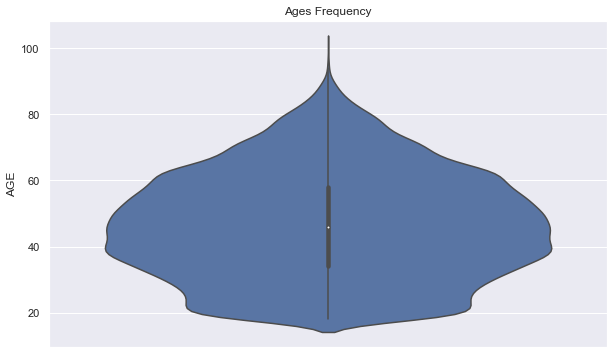

In [15]:
# Cheking age Frequency

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["AGE"])
plt.show()

In [16]:
bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90 +']
df1['AGE_RANGE'] = pd.cut(df1['AGE'],bins,labels = labels, include_lowest = True)

C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Separating active and sedentary population

In [17]:
df_active = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME > CAR_TIME"))

In [18]:
df_active.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT,AGE_RANGE
42,57,FEMALE,YES,1,2,2,4,2100204,1042,21002,975,20101,213,Victoria,6.250,3.75,NA,NA,ACTIVE,50-59
49,60,MALE,NO,1,2,2,2,2100204,1042,21002,975,20101,213,Victoria,2.500,0.00,NA,NA,ACTIVE,60-69
56,69,FEMALE,YES,1,1,1,1,2100204,1042,21002,975,20101,213,Victoria,6.250,0.00,NA,NA,ACTIVE,60-69
63,64,FEMALE,NO,1,2,2,5,2100204,1042,21002,975,20101,213,Victoria,2.500,0.00,NA,NA,ACTIVE,60-69
65,22,FEMALE,YES,1,4,2,2,2100204,1042,21002,975,20101,213,Victoria,5.125,0.00,NA,NA,ACTIVE,18-29


In [19]:
print(df_active.shape)

(4571, 20)


In [20]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4571 entries, 42 to 41527
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 4571 non-null   int64   
 1   GENDER              4571 non-null   object  
 2   ANYWORK             4571 non-null   object  
 3   CARLICENCE          4571 non-null   int64   
 4   HHSTRUCTURE         4571 non-null   int64   
 5   HH_CARS             4571 non-null   int64   
 6   HHINC_grp           4571 non-null   int64   
 7   SA1_code            4571 non-null   int64   
 8   PopDensity_SA1      4571 non-null   int64   
 9   SA2_code            4571 non-null   int64   
 10  PopDensity_SA2      4571 non-null   int64   
 11  SA3_code            4571 non-null   int64   
 12  PopDensity_SA3      4571 non-null   int64   
 13  STATE               4571 non-null   object  
 14  ACTIVE_TRAVEL_TIME  4571 non-null   float64 
 15  CAR_TIME            4571 non-null   

In [21]:
df_sed = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME < CAR_TIME"))

In [22]:
df_sed.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT,AGE_RANGE
0,40,FEMALE,YES,1,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY,40-49
1,73,MALE,NO,1,2,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,25.00,NA,NA,SEDENTARY,70-79
2,85,FEMALE,NO,1,1,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY,80-89
3,34,FEMALE,YES,1,3,1,3,2100108,703,21001,158,20101,213,Victoria,0.0,19.75,NA,NA,SEDENTARY,30-39
4,68,MALE,NO,1,3,2,3,2100108,703,21001,158,20101,213,Victoria,0.0,24.25,NA,NA,SEDENTARY,60-69


In [23]:
print(df_sed.shape)

(36666, 20)


In [24]:
#bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
#labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-97']
#df_active['AGE_RANGE'] = pd.cut(df_active['AGE'],bins,labels = labels, include_lowest = True)

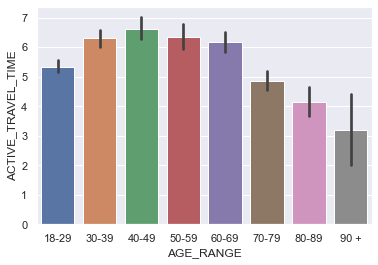

In [25]:
sns.barplot(x = "AGE_RANGE" ,y = "ACTIVE_TRAVEL_TIME", data = df_active)

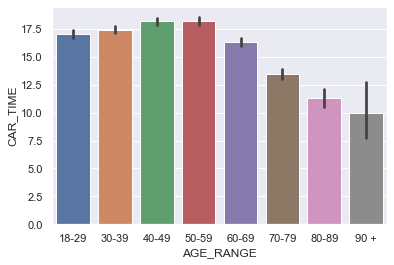

In [26]:
sns.barplot(x = "AGE_RANGE" ,y = "CAR_TIME", data = df_sed)

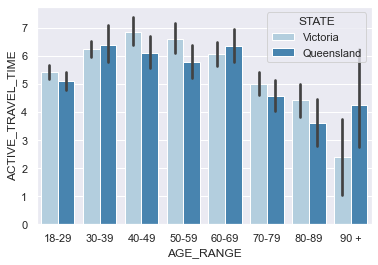

In [27]:
sns.barplot(x = 'AGE_RANGE', y = 'ACTIVE_TRAVEL_TIME', hue = 'STATE', data = df_active,
            palette = 'Blues', edgecolor = 'w')
df_active.groupby(['AGE_RANGE','GENDER']).mean()

plt.show()

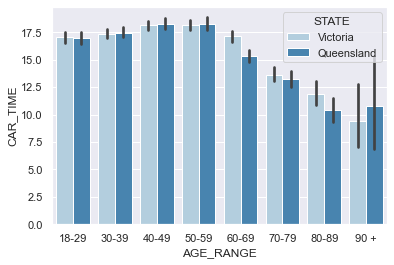

In [28]:
sns.barplot(x = 'AGE_RANGE', y = 'CAR_TIME', hue = 'STATE', data = df_sed,
            palette = 'Blues', edgecolor = 'w')
df_active.groupby(['AGE_RANGE','GENDER']).mean()

plt.show()

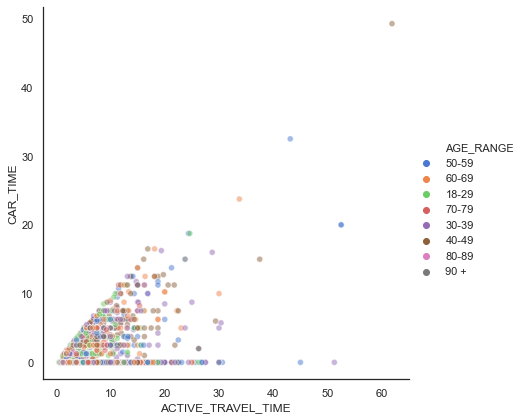

In [29]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="CAR_TIME", hue="AGE_RANGE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_active)

In [30]:
from sklearn.cluster import KMeans

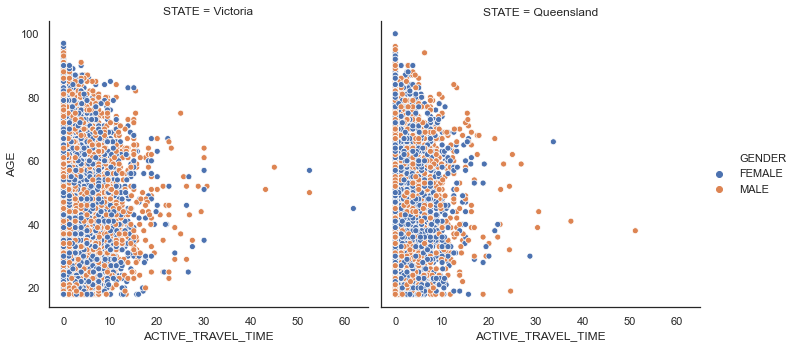

In [31]:
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="AGE", hue="GENDER",col="STATE", data=df1)

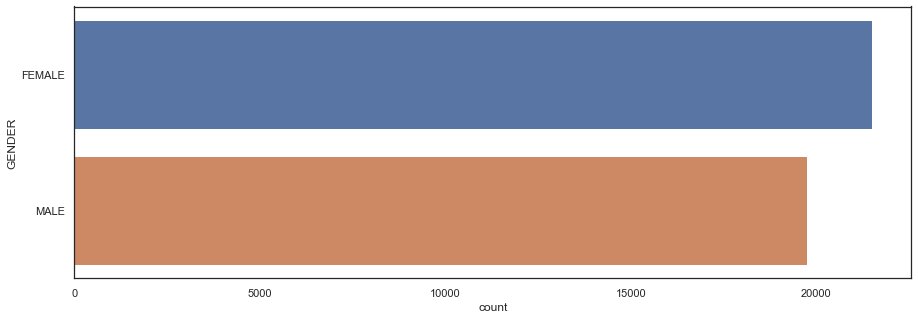

In [32]:
plt.figure(1,figsize = (15,5))
sns.countplot(y= df1['GENDER'])
plt.show()

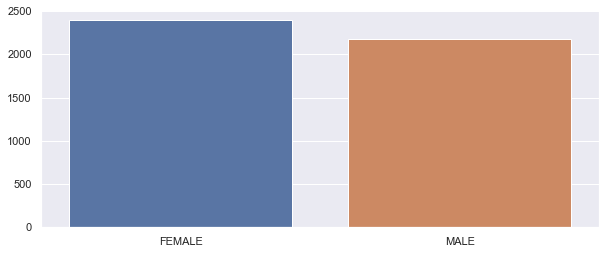

In [33]:
genders = df_active.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Females are more Active as compared to males

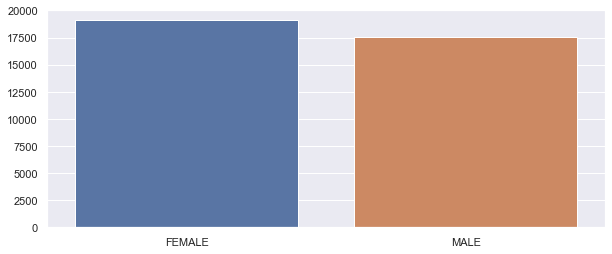

In [34]:
genders = df_sed.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [35]:
X = df1[['AGE' , 'ACTIVE_TRAVEL_TIME']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

C:\Users\bhave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1032: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


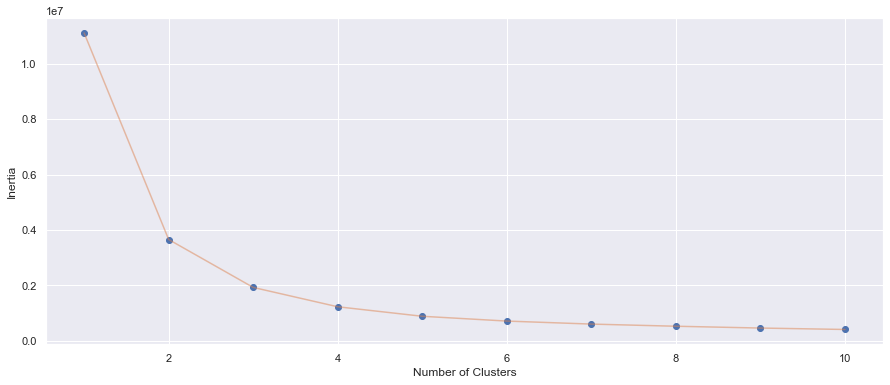

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [37]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

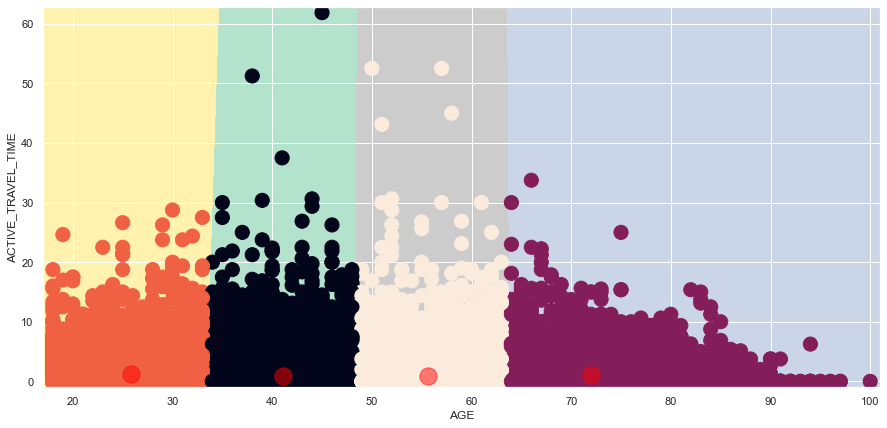

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'AGE' ,y = 'ACTIVE_TRAVEL_TIME' , data = df1 , c = labels1,s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('ACTIVE_TRAVEL_TIME') , plt.xlabel('AGE')
plt.show()

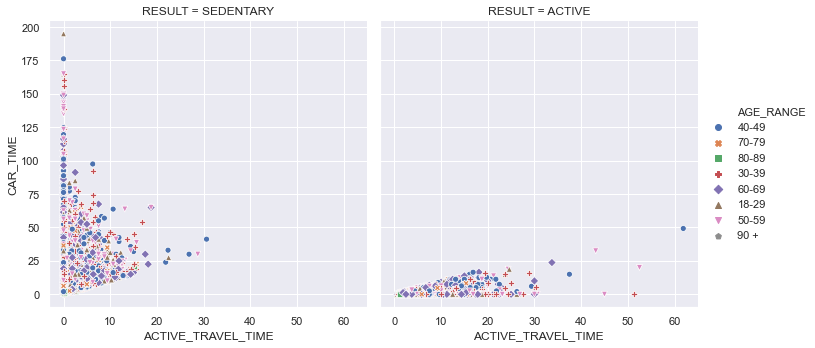

In [40]:
g = sns.relplot(x="ACTIVE_TRAVEL_TIME", y="CAR_TIME", col="RESULT", hue="AGE_RANGE", style="AGE_RANGE",kind="scatter", data=df1)

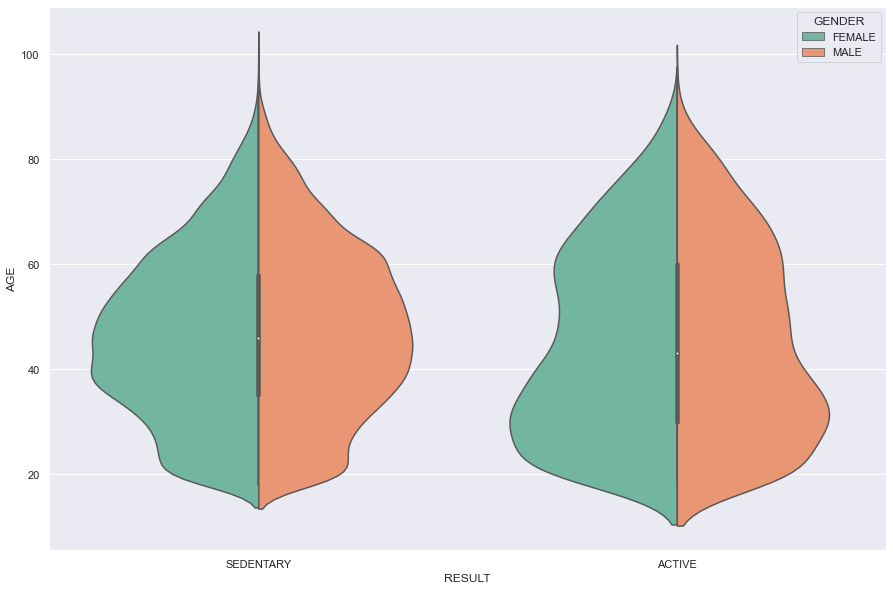

In [41]:
plt.figure(figsize=(15,10))
ax = sns.violinplot(x="RESULT", y="AGE", hue="GENDER", data=df1, palette="Set2", split=True, scale="count")


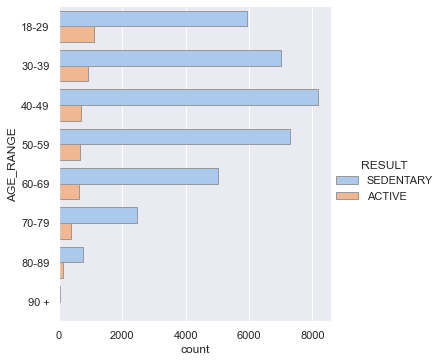

In [42]:
sns.catplot(y="AGE_RANGE", hue="RESULT", kind="count",palette="pastel", edgecolor=".6", data=df1);

In [43]:
# In Active people how many of them is having any work

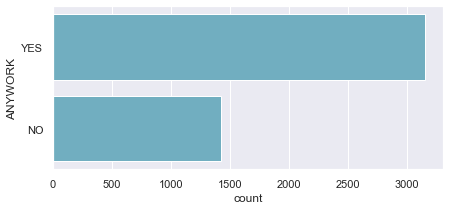

In [44]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ANYWORK", data=df_active, color="c");

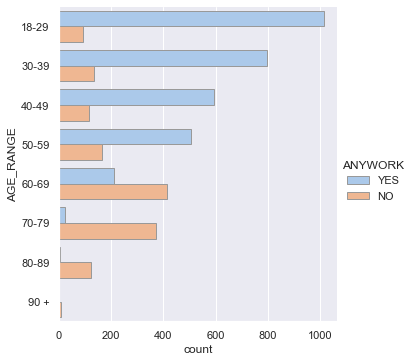

In [45]:
sns.catplot(y="AGE_RANGE", hue="ANYWORK", kind="count",palette="pastel", edgecolor=".6", data=df_active);

In [46]:
# In Sedentary people how many of them is having any work

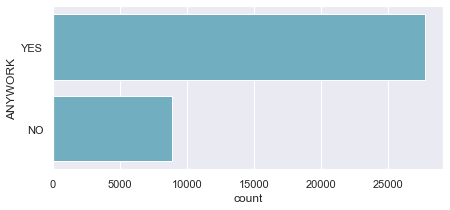

In [47]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="ANYWORK", data=df_sed, color="c");

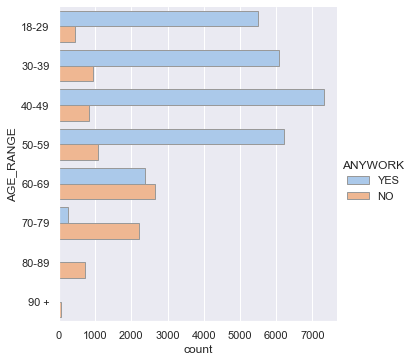

In [48]:
sns.catplot(y="AGE_RANGE", hue="ANYWORK", kind="count",palette="pastel", edgecolor=".6", data=df_sed);

In [49]:
len(df1.SA1_code.unique())

3558

In [50]:
len(df1.SA2_code.unique())

514

In [51]:
len(df1.SA3_code.unique())

105

In [52]:
#sns.catplot(y="SA1_code", hue="RESULT", kind="count",palette="pastel", edgecolor=".6", data=df1);

In [53]:
vic_stat = pd.read_csv("MB_2011_VIC.csv")
vic_stat.head()

,MB_CODE_2011,MB_CATEGORY_2011,SA1_MAINCODE_2011,SA1_7DIGITCODE_2011,SA2_MAINCODE_2011,SA2_5DIGITCODE_2011,SA2_NAME_2011,SA3_CODE_2011,SA3_NAME_2011,SA4_CODE_2011,SA4_NAME_2011,GCCSA_CODE_2011,GCCSA_NAME_2011,STATE_CODE_2011,STATE_NAME_2011,AREA_ALBERS_SQM
0,20000009499,NOUSUALRESIDENCE,29999949999,2949999,299999499,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.),299,Special Purpose Codes SA4 (Vic.),29499,No usual address (Vic.),2,Victoria,NaN
1,20000010000,Education,20403106914,2106914,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,12659.94847
2,20000021000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,12734.45755
3,20000022000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,10504.33849
4,20000023000,Commercial,20403106902,2106902,204031069,21069,Bright - Mount Beauty,20403,Wodonga - Alpine,204,Hume,2RVIC,Rest of Vic.,2,Victoria,10471.23714


In [54]:
qld_stat = pd.read_csv("./MB_2011_QLD.csv")

In [55]:
vic_stat.columns

Index(['MB_CODE_2011', 'MB_CATEGORY_2011', 'SA1_MAINCODE_2011',
       'SA1_7DIGITCODE_2011', 'SA2_MAINCODE_2011', 'SA2_5DIGITCODE_2011',
       'SA2_NAME_2011', 'SA3_CODE_2011', 'SA3_NAME_2011', 'SA4_CODE_2011',
       'SA4_NAME_2011', 'GCCSA_CODE_2011', 'GCCSA_NAME_2011',
       'STATE_CODE_2011', 'STATE_NAME_2011', 'AREA_ALBERS_SQM'],
      dtype='object')

In [56]:
vic_stat.drop(['MB_CODE_2011','MB_CATEGORY_2011','SA1_MAINCODE_2011','SA2_MAINCODE_2011','SA4_CODE_2011',
       'SA4_NAME_2011','GCCSA_CODE_2011','GCCSA_NAME_2011','STATE_CODE_2011','STATE_NAME_2011','AREA_ALBERS_SQM'], axis = 1, inplace = True)

In [57]:
df.head()

,AGE,GENDER,ANYWORK,CARLICENCE,HHSTRUCTURE,HH_CARS,HHINC_grp,SA1_code,PopDensity_SA1,SA2_code,PopDensity_SA2,SA3_code,PopDensity_SA3,STATE,ACTIVE_TRAVEL_TIME,CAR_TIME,SA2_NAME,SA3_NAME,RESULT
0,40,FEMALE,YES,1,4,0,1,2100106,1500,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY
1,73,MALE,NO,1,2,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,25.00,NA,NA,SEDENTARY
2,85,FEMALE,NO,1,1,1,1,2100108,703,21001,158,20101,213,Victoria,0.0,8.75,NA,NA,SEDENTARY
3,34,FEMALE,YES,1,3,1,3,2100108,703,21001,158,20101,213,Victoria,0.0,19.75,NA,NA,SEDENTARY
4,68,MALE,NO,1,3,2,3,2100108,703,21001,158,20101,213,Victoria,0.0,24.25,NA,NA,SEDENTARY


In [58]:
vic_stat.head()

,SA1_7DIGITCODE_2011,SA2_5DIGITCODE_2011,SA2_NAME_2011,SA3_CODE_2011,SA3_NAME_2011
0,2949999,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.)
1,2106914,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
2,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
3,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
4,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine


In [59]:
vic_stat = vic_stat.rename(columns={'SA1_7DIGITCODE_2011': 'SA1_code', 'SA2_5DIGITCODE_2011': 'SA2_code', 'SA2_NAME_2011':'SA2_name','SA3_CODE_2011':'SA3_code','SA3_NAME_2011':'SA3_name'})

In [64]:
vic_stat

,SA1_code,SA2_code,SA2_name,SA3_code,SA3_name
0,2949999,29499,No usual address (Vic.),29999,Special Purpose Codes SA3 (Vic.)
1,2106914,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
2,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
3,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
4,2106902,21069,Bright - Mount Beauty,20403,Wodonga - Alpine
...,...,...,...,...,...
81372,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81373,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81374,2979993,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)
81375,2979991,29799,Migratory - Offshore - Shipping (Vic.),29797,Migratory - Offshore - Shipping (Vic.)


In [86]:
def get_names(sa2code):
    print(sa2code)
    return list(vic_stat[vic_stat['SA2_code']==sa2code]['SA2_name'].unique())[0]

In [87]:
df1['SA2_NAME'] = df1.apply(lambda x:get_names(x['SA2_code']), axis=1)

IndexError: list index out of range

In [ ]:
df1[['SA2_code','SA2_NAME','SA3_code','SA3_NAME']]

In [61]:
df_vic.merge(df1,left_on=['Column1','Column2'],right_on=['col1','col2'],how='left').dropna()[df2.columns]

NameError: name 'df2' is not defined